# Summary Coursera ML
I have used https://github.com/dibgerge/ml-coursera-python-assignments as supplementary to this notes

# Basic Data Analysis

## Move data in Python
There are two main things that we are going to move data around, one of them is the OS library, the other one is using IPython (terminal commands)


In [0]:
#print work directory
!pwd

#list of files in this folder
l = !ls
print(l)

/content
['sample_data']


In [0]:
#Create directory
!mkdir dir_1
!mkdir dir_2

mkdir: cannot create directory ‘dir_1’: File exists
mkdir: cannot create directory ‘dir_2’: File exists


In [0]:
!ls

dir_1  dir_2  sample_data


In [0]:
import os 
dir_ = os.getcwd()
dir_

'/content'

In [0]:
os.chdir(dir_+'/dir_2')
!pwd

/content/dir_2


In [0]:
#change name of a file:

os.chdir(dir_)
os.rename('dir_2','new_name')

!ls

dir_1  new_name  sample_data


## Reading csv:

In [0]:
#First, I am going to create a dummy .csv
import pandas as pd

df = pd.DataFrame([[1,2,3],[2,3,4]],columns=['colA','colB','colC'])
df.head()

,colA,colB,colC
0,1,2,3
1,2,3,4


In [0]:
#save:
df.to_csv('name.csv',index = False)

#Charge data:
df = pd.read_csv('name.csv')

df.head()

,colA,colB,colC
0,1,2,3
1,2,3,4


In [0]:
!ls

dir_1  name.csv  new_name  sample_data


In [0]:
#We can set more options, such as:
#delimeter = ',' (comma separated values)
#header = None (if there is no header)

In [0]:
#In order to extract data from a DataFrame we use
#df.values

## Working with files:

In [0]:
#If the file does not exists, it creates it:

with open('data.txt', 'w') as f:
    f.write('asdasd\nasdasd')

In [0]:
#We read:

with open('data.txt', 'r') as f:
  s = f.read()
  print(s)

asdasd
asdasd


## Operations on a matrix:

### Selection of entries and modification of data:

In [0]:
import numpy as np

x = np.random.random((3,3))
x

array([[0.17284161, 0.0440353 , 0.99718581],
       [0.79264741, 0.38122219, 0.3185216 ],
       [0.19497911, 0.14422484, 0.60222718]])

In [0]:
#We can select using arrays:
x[[0,2],:]

array([[0.17284161, 0.0440353 , 0.99718581],
       [0.19497911, 0.14422484, 0.60222718]])

In [0]:
#And we can modify those values
x[[0,2],:] = [[1,2,3],[2,3,4]]
x

array([[1.        , 2.        , 3.        ],
       [0.79264741, 0.38122219, 0.3185216 ],
       [2.        , 3.        , 4.        ]])

In [0]:
#append a matrix:
y = np.random.random((3,1))

np.append(x,y,axis=1)

array([[1.        , 2.        , 3.        , 0.25602187],
       [0.79264741, 0.38122219, 0.3185216 , 0.85993485],
       [2.        , 3.        , 4.        , 0.56685605]])

In [0]:
y = np.transpose(y)
np.append(x,y,axis=0)

array([[1.        , 2.        , 3.        ],
       [0.79264741, 0.38122219, 0.3185216 ],
       [2.        , 3.        , 4.        ],
       [0.25602187, 0.85993485, 0.56685605]])

In [0]:
#stack:
#add along a new dimension (all have the same shape)
#Then, the axis is going to be decided by axis parameter
x = np.stack([np.zeros(3),np.ones(3)],axis = 0)
x

array([[0., 0., 0.],
       [1., 1., 1.]])

In [0]:
x = np.stack([np.zeros(3),np.ones(3)],axis = 1)
x

array([[0., 1.],
       [0., 1.],
       [0., 1.]])

### Operation on all the entries:

In [0]:
print(x/2)
print(x+2)
print(x**2)
print(np.sin(x))
print(1/x)
print(np.exp(x))

[[0.5       1.        1.5      ]
 [0.3963237 0.1906111 0.1592608]
 [1.        1.5       2.       ]]
[[3.         4.         5.        ]
 [2.79264741 2.38122219 2.3185216 ]
 [4.         5.         6.        ]]
[[ 1.          4.          9.        ]
 [ 0.62828991  0.14533036  0.10145601]
 [ 4.          9.         16.        ]]
[[ 0.84147098  0.90929743  0.14112001]
 [ 0.71221415  0.3720552   0.31316287]
 [ 0.90929743  0.14112001 -0.7568025 ]]
[[1.         0.5        0.33333333]
 [1.26159499 2.62314216 3.13950449]
 [0.5        0.33333333 0.25      ]]
[[ 2.71828183  7.3890561  20.08553692]
 [ 2.20923745  1.46407287  1.37509333]
 [ 7.3890561  20.08553692 54.59815003]]


### Aggregate functions:

In [0]:
#Aggregate functions:
print(np.min(x,axis=0))
print(np.max(x,axis=1))
print(np.sum(x,axis=1))
print(np.mean(x,axis=0))
print(np.std(x,axis=0))

[0.79264741 0.38122219 0.3185216 ]
[3.         0.79264741 4.        ]
[6.        1.4923912 9.       ]
[1.2642158  1.79374073 2.4395072 ]
[0.52711957 1.07901389 1.55433478]


In [0]:
#Arguments of aggregate functions:
print(np.argmax(x,axis=0))

[2 2 2]


### Bitmasks:

In [0]:
#A bit mask is a question (True/False) about the matrix:

x<3

array([[ True,  True, False],
       [ True,  True,  True],
       [ True, False, False]])

In [0]:
#We can aggregate bitmasks with &, |, ^
bitm = ((x<3)&(x>1))
bitm

array([[False,  True, False],
       [False, False, False],
       [ True, False, False]])

In [0]:
#In order to know how many of this elements are there:
np.sum(bitm)

2

In [0]:
#To know the positions where the bitmask is true
w = np.where(bitm)
w

(array([0, 2]), array([1, 0]))

## Plots:

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

### Histogram:

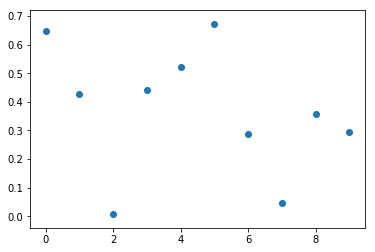

In [159]:
x = np.arange(10)
y = np.random.random(10)
plt.scatter(x,y)

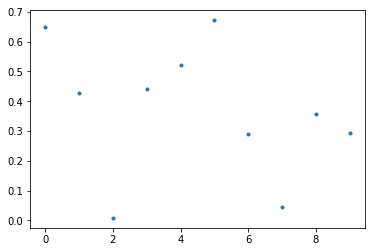

In [162]:
#We can get the same graph with plot
plt.plot(x,y,'.')

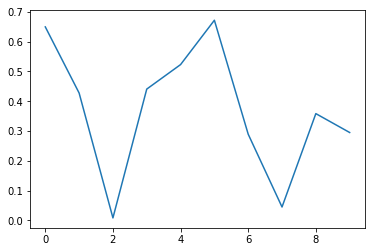

In [163]:
#Notice that if we specify the - as parameter we get a line 
#this is useful when we are fitting a line
plt.plot(x,y,'-')

### x vs y

In [0]:
x = np.arange(0,10,0.1)
y = np.sin(x)

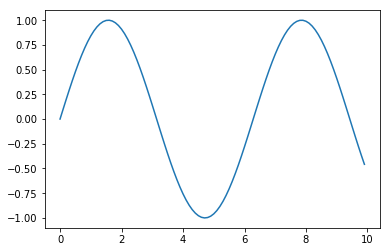

In [0]:
#To make a simple graph between two variables:
plt.plot(x,y);

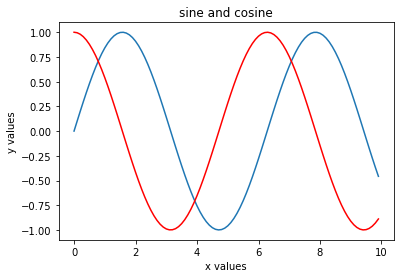

In [0]:
y_alt = np.cos(x)

#We can make multiple graphs over the same figure
plt.plot(x,y)
plt.plot(x,y_alt,color='r')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('sine and cosine');

### Figures:
In matplotlib the basic structure is the figure command, which is a class. So we can use it to have multiple plots.

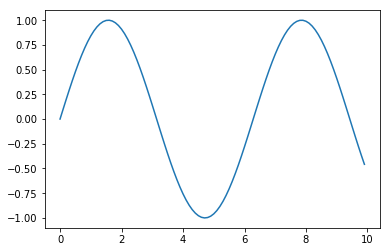

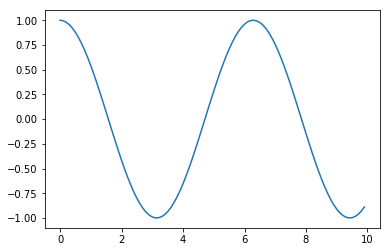

In [0]:
fig1 = plt.figure()
plt.plot(x,y)

fig2 = plt.figure()
plt.plot(x,y_alt);

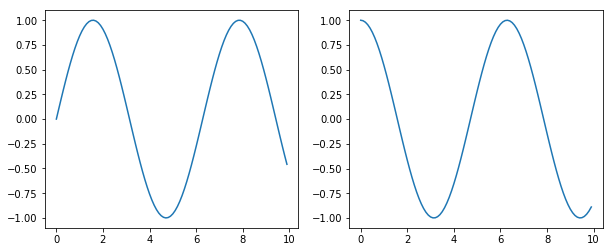

In [0]:
#Notice that we represent the graphs in two different places
#But if we want to represent the graph over the same figure:

plt.figure(figsize = (10,4))
#Now we are working over this figure

#With this command we specify the rows, cols and position
plt.subplot(1,2,1)

plt.plot(x,y)

plt.subplot(1,2,2)
plt.plot(x,y_alt);

### Save images:

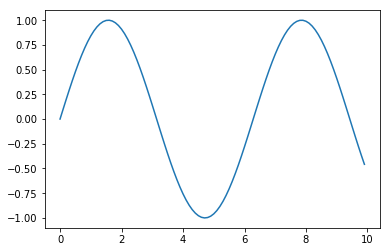

In [0]:
#We plot
plt.plot(x,y)

#We save the image
plt.savefig('output.png', dpi=300, bbox_inches='tight');

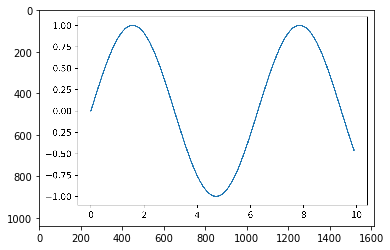

In [0]:
#You most likely don't need this but, charge image:

import matplotlib.image as mpimg
img=mpimg.imread('output.png')
imgplot=plt.imshow(img)
plt.show()

### Legend and xticks:

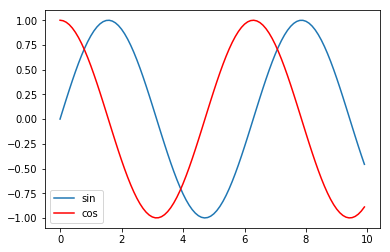

In [0]:
plt.plot(x,y)
plt.plot(x,y_alt,'r')

#We can specify the legend with an array
plt.legend(['sin','cos']);

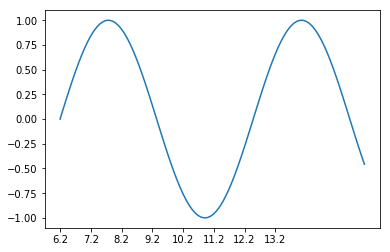

In [0]:
plt.plot(x,y)

k = 1
x_aux = np.arange(0,2*np.pi + k, k)

plt.xticks(x_aux,x_aux + 2*3.1);

### Histogram and Colormap
Reference:
https://stackoverflow.com/questions/40887753/display-matrix-values-and-colormap

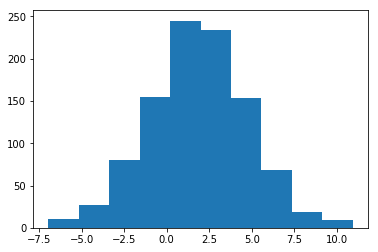

In [0]:
x = np.random.normal(2,3,1000)

#To create a histogram
plt.hist(x);

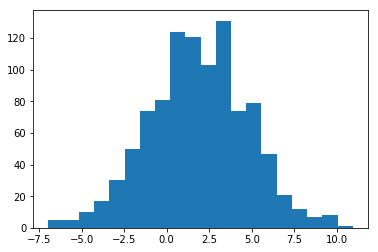

In [0]:
#To indicate the number of bins:
plt.hist(x,bins=20);

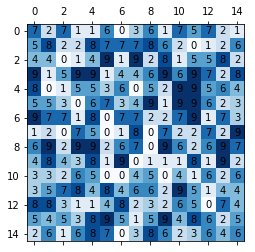

In [0]:
#Colormap:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

min_val, max_val = 0, 15

intersection_matrix = np.random.randint(0,10,(max_val, max_val))

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for i in np.arange(15):
    for j in np.arange(15):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

# Regression and Gradient descent:

## Cost Function vectorized:

In [0]:
def cost_func(x,y,theta):
  """"Receives x as matrix and theta as row"""
  n = y.shape[0]
  aux = x@theta - y
  return (aux@aux)/(2 * n)

## Gradient descent vectorized:

In [0]:
def gradient_descent(x,y,theta,alpha,num_it):
  
  n = y.shape[0]
  p_ = x.shape[1]
  j_list = [cost_func(x,y,theta)]
  
  for i in range(num_it):
    
    #Compute delt
    delt = np.zeros((p_))
    for i in range(n):
      delt += (x[i,:]@theta - y[i])*x[i,:]
    delt = delt/n
    
    #update
    theta = theta - delt*alpha
    j_list.append(cost_func(x,y,theta))  
  
  return (theta,j_list)

## Example

In [0]:
long = 5

x1 = np.arange(long)
x2 = np.arange(long,2*long)
x0 = np.ones(long)

X = np.stack([x0,x1,x2],axis=1)

theta = np.ones((3))
Y = x1+x2+3
alpha = 0.001

In [0]:
#GRADIENT DESCENT:
(theta,jlist) = gradient_descent(X,Y,theta,alpha,300)
  
print((X@theta).transpose())
print(Y.transpose())

[ 7.43511023  9.6765904  11.91807056 14.15955072 16.40103088]
[ 8 10 12 14 16]


### Predictions:

In [0]:
#we have to add an extra 1 at the begining
x_new = [1,1,2]

x_new@theta

4.577770939784363

## Plotting in gradient descent and linear regression:

Text(0, 0.5, 'J(theta)')

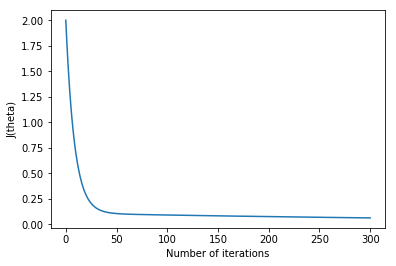

In [0]:
#A little plot
import matplotlib.pyplot as plt 
plt.plot(jlist)
plt.xlabel('Number of iterations')
plt.ylabel('J(theta)')

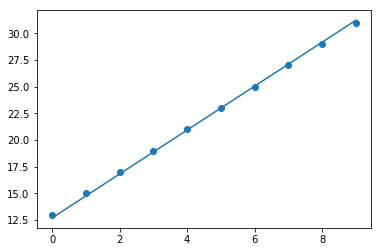

In [0]:
plt.scatter(X[:,1],Y)

#this give us a line since X@theta form a line
plt.plot(X[:, 1], (X@theta),'-');

### Multiple learning rates:

In [0]:

def try_alpha(X,Y,theta,alpha,num_it):
  historial = []
  for al in alpha:
    
    #We use try and except to avoid overflow errors
    try:
      theta,aux = gradient_descent(X,Y,theta,al,num_it)
      historial.append(aux)
    except:
      print("Learning rate produces an overflow")
  
  import seaborn as sbn
  colors = sbn.color_palette(n_colors = len(historial))
  
  for i,g in enumerate(historial):
    plt.plot(g,c = colors[i]);
    
  plt.legend(alpha)

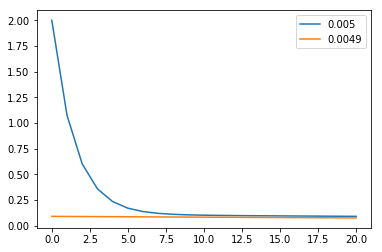

In [0]:
alpha = [0.005,0.0049]
long = 5

x1 = np.arange(long)
x2 = np.arange(long,2*long)
x0 = np.ones(long)

X = np.stack([x0,x1,x2],axis=1)

theta = np.ones((3))
Y = x1+x2+3

try_alpha(X,Y,theta,alpha,20)

## Normalizing:

In [0]:
def normalize(x):
  #The 1's should be added after this
  
  mu = x.mean(axis=0)
  std = x.std(axis=0)
  x_est = (x-mu)/std
  
  ##We save the mu and std in order to transform predictions
  return x_est,mu,std

In [0]:
x1 = np.arange(10)
x2 = np.arange(2,12)
X = np.stack([x1,x2],axis = 1)
X_norm,mu,std = normalize(X)
X_norm = np.append(np.ones((10,1)),X_norm,axis=1)
X_norm

array([[ 1.        , -1.5666989 , -1.5666989 ],
       [ 1.        , -1.21854359, -1.21854359],
       [ 1.        , -0.87038828, -0.87038828],
       [ 1.        , -0.52223297, -0.52223297],
       [ 1.        , -0.17407766, -0.17407766],
       [ 1.        ,  0.17407766,  0.17407766],
       [ 1.        ,  0.52223297,  0.52223297],
       [ 1.        ,  0.87038828,  0.87038828],
       [ 1.        ,  1.21854359,  1.21854359],
       [ 1.        ,  1.5666989 ,  1.5666989 ]])

In [155]:
#We need to do the same with the predictions
x_pred = [3,3]
x_pred = (x_pred - mu)/std
x_pred = np.append(1,x_pred)
x_pred

array([ 1.        , -0.52223297, -1.21854359])

## Normal Equations:

In [0]:
def normal_eq(X,Y):
  return np.linalg.inv((X.transpose()@X))@X.transpose()@y